<img src="https://github.com/Unidata/MetPy/raw/main/docs/_static/metpy_150x150.png" width=150 alt="MetPy logo"></img>
<img src="https://github.com/Unidata/MetPy/raw/main/docs/_static/unidata_150x150.png" width=150 alt="Unidata logo"></img>

# Reading files

---

## Overview
`metpy.io` contains various tools for reading some special meteorological data formats. Notably, these tools can allow you to explore
 - METARs, and files full of them!
 - GEMPAK formatted surface, sounding, or gridded data
 - NEXRAD Level 2 and Level 3 files
 - GINI satellite files

---

## Imports

In [1]:
import matplotlib.pyplot as plt

# get_test_data is primarily for internal testing and documentation
from metpy.cbook import get_test_data
from metpy.io import GempakSounding, parse_metar_file, Level3File
from metpy.units import pandas_dataframe_to_unit_arrays

## METAR
For parsing [entire files](unidata.github.io/MetPy/latest/api/generated/metpy.io.parse_metar_file.html) or individual [text reports](https://unidata.github.io/MetPy/latest/api/generated/metpy.io.parse_metar_to_dataframe.html) into `pandas.DataFrame`s.

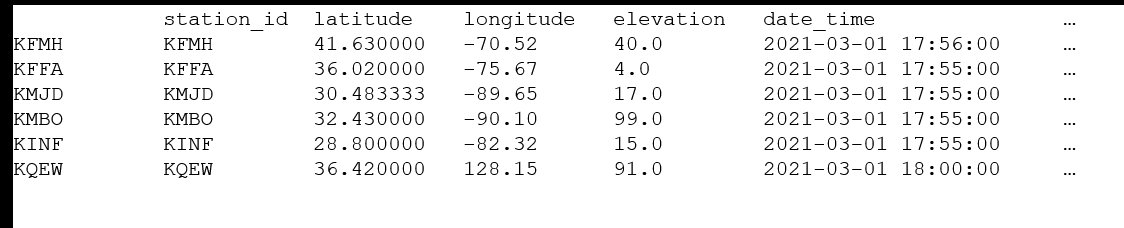

In [2]:
input_file = get_test_data('metar_20190701_1200.txt', as_file_obj=False)

df = parse_metar_file(input_file)
df

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KRCM,KRCM,38.780000,-93.800000,244.0,2022-02-01 11:55:00,0.0,0.0,NaN,16093.440,NaN,...,21.0,20.0,30.05,0,0,0,AO2,1017.25,-0.000000,-0.000000
KIPJ,KIPJ,35.470000,-81.170000,267.0,2022-02-01 11:50:00,0.0,0.0,NaN,11265.408,NaN,...,21.0,21.0,30.02,0,0,0,AO2 70004 T02120212 10225 20196,1016.15,-0.000000,-0.000000
KGPH,KGPH,39.330000,-94.320000,235.0,2022-02-01 11:55:00,0.0,0.0,NaN,16093.440,NaN,...,21.0,20.0,30.05,0,0,0,AO2,1017.27,-0.000000,-0.000000
KMAW,KMAW,36.600000,-90.000000,90.0,2022-02-01 11:55:00,NaN,NaN,NaN,16093.440,NaN,...,25.0,22.0,30.08,0,0,0,AO2,1018.56,NaN,NaN
KSTF,KSTF,33.430000,-88.850000,102.0,2022-02-01 11:55:00,0.0,0.0,NaN,NaN,NaN,...,21.0,21.0,30.07,0,0,0,AO2 PWINO,1018.33,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VILH,VILH,34.133333,77.550000,3256.0,2022-02-01 12:30:00,300.0,20.0,30.0,6000.000,NaN,...,23.0,NaN,NaN,0,0,0,-1 Q1016 NOSIG,NaN,17.320508,-10.000000
VISR,VISR,33.970000,74.770000,1666.0,2022-02-01 12:30:00,NaN,2.0,NaN,6000.000,NaN,...,22.0,15.0,29.94,0,0,0,,1005.71,NaN,NaN
VAUD,VAUD,24.620000,73.900000,513.0,2022-02-01 12:30:00,320.0,6.0,NaN,4000.000,HZ,...,34.0,23.0,29.53,5,0,0,,996.02,3.856726,-4.596267


In [3]:
pandas_dataframe_to_unit_arrays(df)

{'station_id': array(['KRCM', 'KIPJ', 'KGPH', ..., 'VAUD', 'VAUD', 'VIDN'], dtype=object),
 'latitude': array([38.78      , 35.47      , 39.33      , ..., 24.62      ,
        24.62      , 30.31666667]) <Unit('degree')>,
 'longitude': array([-93.8       , -81.17      , -94.32      , ...,  73.9       ,
         73.9       ,  78.03333333]) <Unit('degree')>,
 'elevation': array([244., 267., 235., ..., 513., 513., 683.]) <Unit('meter')>,
 'date_time': array(['2022-02-01T11:55:00.000000000', '2022-02-01T11:50:00.000000000',
        '2022-02-01T11:55:00.000000000', ...,
        '2022-02-01T12:30:00.000000000', '2022-02-01T12:00:00.000000000',
        '2022-02-01T12:30:00.000000000'], dtype='datetime64[ns]'),
 'wind_direction': array([  0.,   0.,   0., ..., 320., 230., 280.]) <Unit('degree')>,
 'wind_speed': array([0., 0., 0., ..., 6., 6., 4.]) <Unit('knot')>,
 'wind_gust': array([nan, nan, nan, ..., nan, nan, nan]) <Unit('knot')>,
 'visibility': array([16093.44 , 11265.408, 16093.44 , ...,  

## Gempak

In [4]:
input_file = get_test_data('gem_model_mrg.snd')

gso = GempakSounding(input_file).snxarray()
gso

[<xarray.Dataset>
 Dimensions:   (time: 1, pressure: 50)
 Coordinates:
   * time      (time) datetime64[ns] 2020-11-01T22:00:00
   * pressure  (pressure) float32 991.7 988.8 983.5 974.2 ... 38.1 32.5 27.2 22.4
 Data variables: (12/15)
     tmpc      (time, pressure) float32 2.74 2.54 2.04 ... -57.06 -56.46 -56.16
     dwpc      (time, pressure) float32 -8.59 -9.14 -9.89 -11.0 ... nan nan nan
     sped      (time, pressure) float32 5.58 8.06 9.46 10.72 ... 11.72 9.84 11.57
     drct      (time, pressure) float32 302.5 307.4 308.6 ... 296.4 295.3 279.9
     hght      (time, pressure) float32 292.1 315.8 359.2 ... 2.443e+04 2.566e+04
     omeg      (time, pressure) float32 -0.2 -0.2 -0.2 -0.2 ... 0.0 0.0 0.0 0.0
     ...        ...
     dtsw      (time, pressure) float32 nan nan nan nan nan ... nan nan nan nan
     dtlw      (time, pressure) float32 nan nan nan nan nan ... nan nan nan nan
     cfrl      (time, pressure) float32 nan nan nan nan nan ... nan nan nan nan
     tkel      (time,

## NEXRAD

In [5]:
input_file = get_test_data(f'nids/KOUN_SDUS54_N0QTLX_201305202016', as_file_obj=False)
f = Level3File(input_file)
f

/home/dcamron/.cache/metpy/v1.2.0/nids/KOUN_SDUS54_N0QTLX_201305202016: Base Reflectivity Data Array
MsgHdr(code=94, date=15846, time=73025, msg_len=22962, src_id=1, dest_id=0, num_blks=3)
ProdDesc(divider=-1, lat=35333, lon=-97278, height=1277, prod_code=94, op_mode=2, vcp=12, seq_num=1448, vol_num=28, vol_date=15846, vol_start_time=73003, prod_gen_date=15846, prod_gen_time=73009, dep1=0, dep2=0, el_num=1, dep3=5, thr1=-320, thr2=5, thr3=254, thr4=0, thr5=0, thr6=0, thr7=0, thr8=0, thr9=0, thr10=0, thr11=0, thr12=0, thr13=0, thr14=0, thr15=0, thr16=0, dep4=68, dep5=0, dep6=0, dep7=0, dep8=1, dep9=2, dep10=-28818, version=0, spot_blank=0, sym_off=60, graph_off=0, tab_off=0)
[-320, 5, 254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 68, 0, 0, 0, 1, 2, 36718]
{'msg_time': datetime.datetime(2013, 5, 20, 20, 17, 5), 'vol_time': datetime.datetime(2013, 5, 20, 20, 16, 43), 'prod_time': datetime.datetime(2013, 5, 20, 20, 16, 49), 'el_angle': 0.5, 'max': 68, 'delta_time': 0, 'supplemental